### 시도별 전출입 인구수 분석 - Matplotlib
- 데이터셋 : 1970 ~ 2017년 까지 인구 이동수
- 대구의 타지역 이동 인구수 분석
- 전국의 인구 이동수에 대한 분석
- 과정
    - 데이터 파일 확인
        - 첫번째 줄이 컬럼명이 맞는지 확인
        - 불필요한 컬럼이나 행이 있는지 확인
        - 결측치 정도 확인
    - 전처리 : 데이터 정리 및 손질
        - 파일 확인 후 체크한 사항 진행
        - 결측치 처리
        - 중복데이터 처리
        - 형변환(표준화) => 실제 데이터와 타입 일치
    - 데이터 가공 : 내가분석하고자 하는 형태로 만들어줌
        - 행인덱스 처리 : 멀티인덱스/컬럼=>행인덱스/행인덱스 초기화
        - 필요한 컬럼 & 행 추출
        - 추가적인 결측치/이상치/중복데이터 처리
        - 형변환 => 연속형을 범주형, 범주형을 연속형
    - 데이터 분석
        - 탐색적 분석 : 주어진 데이터를 기반으로 의미를 찾아내는 것
        - 시각화 및 분석 결과 텍스트 요약 정리

[1] 준비과정 : 모듈, 데이터

In [1]:
# 모듈로딩
import pandas as pd                         # 데이터 분석
import numpy as np                          # 데이터 시각화 또는 결측치 등에 필요
import matplotlib.pyplot as plt             # 데이터 시각화
import matplotlib.font_manager as fm
from matplotlib import rc                   # 폰트 정리

In [2]:
# 데이터준비
file_path = '../data/시도별 전출입 인구수.xlsx'
font_path = '../font/NanumMyeojo.ttf'

In [3]:
# 데이터 불어오기
data_df = pd.read_excel(file_path) 

- [2] 데이터 확인 : 행과 컬럼수, 실제데이터와 컬럼타입, 결측치체크

In [4]:
# 기본정보 확인 -> info(), descrube()
# - 행수, 컬럼수, 컬럼별 결측치 아닌 데이터수,  컬럼별 데이터 타입, 메모리 사용량
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 50 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   전출지별    18 non-null     object
 1   전입지별    324 non-null    object
 2   1970    325 non-null    object
 3   1971    325 non-null    object
 4   1972    325 non-null    object
 5   1973    325 non-null    object
 6   1974    325 non-null    object
 7   1975    325 non-null    object
 8   1976    325 non-null    object
 9   1977    325 non-null    object
 10  1978    325 non-null    object
 11  1979    325 non-null    object
 12  1980    325 non-null    object
 13  1981    325 non-null    object
 14  1982    325 non-null    object
 15  1983    325 non-null    object
 16  1984    322 non-null    object
 17  1985    322 non-null    object
 18  1986    322 non-null    object
 19  1987    325 non-null    object
 20  1988    325 non-null    object
 21  1989    325 non-null    object
 22  1990    325 non-null    ob

In [5]:
# - 수치 데이터 컬럼의 데이터 분포 확인 : 최댓값, 최솟값, 표준편차, 사분위수, 평균, 데이터수
# - 범주형 데이터 컬럼의 데이터 분포 확인 : 고유값, 최빈값, 빈도수, 데이터 수
data_df.describe(include='all')

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
count,18,324,325,325,325,325,325,325,325,325,...,325,325,325,325,325,325,325,325,325,325
unique,18,18,146,146,146,146,145,146,146,146,...,289,289,289,291,323,320,321,324,322,323
top,전국,전국,-,-,-,-,-,-,-,-,...,-,-,-,-,1489,822,2026,1468,907,947
freq,1,18,180,180,180,180,180,180,180,180,...,35,35,35,35,2,2,2,2,2,2


In [6]:
# 실제 데이터와 info()에서 확인한 데이터 타입 비교 => head()/tail()
data_df.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,NaN,NaN,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


In [7]:
data_df.tail()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
320,NaN,전라북도,139,202,141,210,219,415,392,408,...,668,579,672,561,551,516,609,683,733,768
321,NaN,전라남도,631,965,857,952,1133,2808,2608,2652,...,1143,1123,1002,1026,966,1001,928,1062,1127,1102
322,NaN,경상북도,374,619,468,576,625,1123,1141,1004,...,761,704,738,756,699,781,728,903,931,994
323,NaN,경상남도,474,479,440,571,1208,1517,863,1122,...,1517,1474,1324,1367,1227,1278,1223,1500,1448,1501
324,NaN,제주특별자치도,9290,12427,12210,16158,19580,34221,23291,31028,...,59564,55673,55507,59846,54280,60607,59673,59036,66444,63275


In [8]:
# 기본 정보 확인 후 결과
# - 불필요한 행/컬럼 : 0번 행 삭제
# - 결측치 : '전출지별 ' 컬럼 ==> 이전행의 값으로 채우면 될듯
# - 이상치 : 행별로 '-' 값이 수치값과 섞여 있음 ==> 처리 필요

[3] 데이터 전처리
- 기본확인에서 파악된 내용들 처리
    - 불필요 데이터 삭제 : 0번 행 삭제
    - 결측치 에이터 저리 : '전출지별' 컬럼처리
    - 이상치 데이터 처리 : '-'에 대한 처리
    - 데이터 자료형 일치 : 형변환

In [9]:
# - 불필요 데이터 처리
data_df_1 = data_df.drop(index=0)
data_df_1.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182
5,NaN,인천광역시,-,-,-,-,-,-,-,-,...,565585,478169,462051,499567,468666,461613,452297,473223,441646,409465


In [10]:
# - 결측치 처리
data_df_1.isna().sum()

전출지별    306
전입지별      0
1970      0
1971      0
1972      0
1973      0
1974      0
1975      0
1976      0
1977      0
1978      0
1979      0
1980      0
1981      0
1982      0
1983      0
1984      3
1985      3
1986      3
1987      0
1988      0
1989      0
1990      0
1991      0
1992      0
1993      0
1994      0
1995      0
1996      0
1997      0
1998      0
1999      0
2000      0
2001      0
2002      0
2003      0
2004      0
2005      0
2006      0
2007      0
2008      0
2009      0
2010      0
2011      0
2012      0
2013      0
2014      0
2015      0
2016      0
2017      0
dtype: int64

In [11]:
# -1984, 1985, 1986 칼럼만 추출
# data_df_1.columns
a = data_df_1[['1984', '1985', '1986']].isna()
a[a.sum(axis=1) > 0]

,1984,1985,1986
34,True,True,True
35,True,True,True
36,True,True,True


In [12]:
# 전출지 결측지 채우기
data_df_1['전출지별'] = data_df_1['전출지별'].ffill()
data_df_1['전출지별']

1           전국
2           전국
3           전국
4           전국
5           전국
        ...   
320    제주특별자치도
321    제주특별자치도
322    제주특별자치도
323    제주특별자치도
324    제주특별자치도
Name: 전출지별, Length: 324, dtype: object

In [13]:
# 값이 없는 결측치 채우기
data_df_1[['1984', '1985', '1986']] = data_df_1[['1984', '1985', '1986']].fillna(0) # 컬럼을 들고 오니까 안뜬다.

In [14]:
# 결측치 재확인
data_df_1.isna().sum()

전출지별    0
전입지별    0
1970    0
1971    0
1972    0
1973    0
1974    0
1975    0
1976    0
1977    0
1978    0
1979    0
1980    0
1981    0
1982    0
1983    0
1984    0
1985    0
1986    0
1987    0
1988    0
1989    0
1990    0
1991    0
1992    0
1993    0
1994    0
1995    0
1996    0
1997    0
1998    0
1999    0
2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
2008    0
2009    0
2010    0
2011    0
2012    0
2013    0
2014    0
2015    0
2016    0
2017    0
dtype: int64

In [15]:
data_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 1 to 324
Data columns (total 50 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   전출지별    324 non-null    object
 1   전입지별    324 non-null    object
 2   1970    324 non-null    object
 3   1971    324 non-null    object
 4   1972    324 non-null    object
 5   1973    324 non-null    object
 6   1974    324 non-null    object
 7   1975    324 non-null    object
 8   1976    324 non-null    object
 9   1977    324 non-null    object
 10  1978    324 non-null    object
 11  1979    324 non-null    object
 12  1980    324 non-null    object
 13  1981    324 non-null    object
 14  1982    324 non-null    object
 15  1983    324 non-null    object
 16  1984    324 non-null    object
 17  1985    324 non-null    object
 18  1986    324 non-null    object
 19  1987    324 non-null    object
 20  1988    324 non-null    object
 21  1989    324 non-null    object
 22  1990    324 non-null    ob

- 결측치부분 추가 설명

In [16]:
df2 = pd.DataFrame([[1, 2, pd.NA], [pd.NA, pd.NA, 2], [pd.NA, 3, 3]])
df2

,0,1,2
0,1,2,<NA>
1,<NA>,<NA>,2
2,<NA>,3,3


In [17]:
# 0번 컬럼을 이전 값으로 채우기
df2[0] = df2[0].ffill()
df2

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_24000\1250383217.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2[0] = df2[0].ffill()


,0,1,2
0,1,2,<NA>
1,1,<NA>,2
2,1,3,3


In [18]:
# 이제는 다운캐스팅이 False 이기에 설정을 바꿔야함
pd.set_option('future.no_silent_downcasting', True)

df2[[1,2]] = df2[[1, 2]].fillna(0)  # 복사본으로 안 덮으면 적용이 안되는 사례가 존재함.
df2

,0,1,2
0,1,2,0
1,1,0,2
2,1,3,3


In [19]:
# 이상치 처리
data_df_2 = data_df_1.replace('-', 0)
data_df_2.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,전국,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,전국,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,전국,대구광역시,0,0,0,0,0,0,0,0,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182
5,전국,인천광역시,0,0,0,0,0,0,0,0,...,565585,478169,462051,499567,468666,461613,452297,473223,441646,409465


In [20]:
# 자료형 변환
# 컬럼별로 데이터형을 다르게 해야하는 경우 이런 방법으로 처리 해줄 수 있음
d_ = dict(zip(data_df_2.columns[2:].to_list(), ['int']*(data_df_2.shape[-1] -2)))   # 저체 컬럼 수에서 2개 빼고 int
data_df_2 = data_df_2.astype(d_)

In [21]:
data_df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 1 to 324
Data columns (total 50 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   전출지별    324 non-null    object
 1   전입지별    324 non-null    object
 2   1970    324 non-null    int64 
 3   1971    324 non-null    int64 
 4   1972    324 non-null    int64 
 5   1973    324 non-null    int64 
 6   1974    324 non-null    int64 
 7   1975    324 non-null    int64 
 8   1976    324 non-null    int64 
 9   1977    324 non-null    int64 
 10  1978    324 non-null    int64 
 11  1979    324 non-null    int64 
 12  1980    324 non-null    int64 
 13  1981    324 non-null    int64 
 14  1982    324 non-null    int64 
 15  1983    324 non-null    int64 
 16  1984    324 non-null    int64 
 17  1985    324 non-null    int64 
 18  1986    324 non-null    int64 
 19  1987    324 non-null    int64 
 20  1988    324 non-null    int64 
 21  1989    324 non-null    int64 
 22  1990    324 non-null    in

[4] 데이터 가공
- 대구에서 전지역 전입 인구수 분석
- 전출지 - 대구광역시
- 전입지별 - 대구광역시, 전국 제외

In [22]:
# 대구과역시 데이터만 추출
mask = (data_df_2['전출지별'] == '대구광역시')
deagu_df = data_df_2[mask]
deagu_df

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
55,대구광역시,전국,0,0,0,0,0,0,0,0,...,422676,411288,382657,383310,359206,363224,365739,364364,337488,333118
56,대구광역시,서울특별시,0,0,0,0,0,0,0,0,...,14824,15469,13915,13310,13838,13673,13735,13038,12802,13011
57,대구광역시,부산광역시,0,0,0,0,0,0,0,0,...,5066,5207,5050,4906,5216,5543,6157,5182,4860,4840
58,대구광역시,대구광역시,0,0,0,0,0,0,0,0,...,311113,298755,274649,276495,254661,258107,252642,259185,240722,236143
59,대구광역시,인천광역시,0,0,0,0,0,0,0,0,...,2125,2003,1968,2000,1979,2202,2015,1987,1962,1930
60,대구광역시,광주광역시,0,0,0,0,0,0,0,0,...,563,624,527,577,711,622,902,629,547,515
61,대구광역시,대전광역시,0,0,0,0,0,0,0,0,...,2106,2057,1956,2063,2144,2219,2254,2085,1949,1978
62,대구광역시,울산광역시,0,0,0,0,0,0,0,0,...,4283,3740,3551,3586,3844,3833,3835,3675,3266,2604
63,대구광역시,세종특별자치시,0,0,0,0,0,0,0,0,...,0,0,0,0,261,233,526,879,642,827
64,대구광역시,경기도,0,0,0,0,0,0,0,0,...,13724,14534,14596,13320,13581,13659,12813,12322,11918,12354


In [23]:
# 전출지별 컬럼 삭제
# deagu_df = deagu_df.drop(columns='전출지별')

# 전입지별 컬럼 행인겟스 설정
deagu_df.set_index('전입지별', inplace=True)

In [24]:
# 대구광역시 , 전국행 삭제
deagu_df_1 = deagu_df.drop(index=['전국', '대구광역시'])
deagu_df_1

,전출지별,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지별,,,,,,,,,,,,,,,,,,,,,
서울특별시,대구광역시,0,0,0,0,0,0,0,0,0,...,14824,15469,13915,13310,13838,13673,13735,13038,12802,13011
부산광역시,대구광역시,0,0,0,0,0,0,0,0,0,...,5066,5207,5050,4906,5216,5543,6157,5182,4860,4840
인천광역시,대구광역시,0,0,0,0,0,0,0,0,0,...,2125,2003,1968,2000,1979,2202,2015,1987,1962,1930
광주광역시,대구광역시,0,0,0,0,0,0,0,0,0,...,563,624,527,577,711,622,902,629,547,515
대전광역시,대구광역시,0,0,0,0,0,0,0,0,0,...,2106,2057,1956,2063,2144,2219,2254,2085,1949,1978
울산광역시,대구광역시,0,0,0,0,0,0,0,0,0,...,4283,3740,3551,3586,3844,3833,3835,3675,3266,2604
세종특별자치시,대구광역시,0,0,0,0,0,0,0,0,0,...,0,0,0,0,261,233,526,879,642,827
경기도,대구광역시,0,0,0,0,0,0,0,0,0,...,13724,14534,14596,13320,13581,13659,12813,12322,11918,12354
강원도,대구광역시,0,0,0,0,0,0,0,0,0,...,1996,1942,2039,1843,1807,1820,1884,1884,1748,1657


In [25]:
deagu_df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, 서울특별시 to 제주특별자치도
Data columns (total 49 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   전출지별    16 non-null     object
 1   1970    16 non-null     int64 
 2   1971    16 non-null     int64 
 3   1972    16 non-null     int64 
 4   1973    16 non-null     int64 
 5   1974    16 non-null     int64 
 6   1975    16 non-null     int64 
 7   1976    16 non-null     int64 
 8   1977    16 non-null     int64 
 9   1978    16 non-null     int64 
 10  1979    16 non-null     int64 
 11  1980    16 non-null     int64 
 12  1981    16 non-null     int64 
 13  1982    16 non-null     int64 
 14  1983    16 non-null     int64 
 15  1984    16 non-null     int64 
 16  1985    16 non-null     int64 
 17  1986    16 non-null     int64 
 18  1987    16 non-null     int64 
 19  1988    16 non-null     int64 
 20  1989    16 non-null     int64 
 21  1990    16 non-null     int64 
 22  1991    16 non-null     

In [26]:
deagu_df_1.columns, deagu_df_1.index, deagu_df_1.dtypes

(Index(['전출지별', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
        '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
        '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
        '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
        '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
        '2014', '2015', '2016', '2017'],
       dtype='object'),
 Index(['서울특별시', '부산광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시', '세종특별자치시', '경기도',
        '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도', '제주특별자치도'],
       dtype='object', name='전입지별'),
 전출지별    object
 1970     int64
 1971     int64
 1972     int64
 1973     int64
 1974     int64
 1975     int64
 1976     int64
 1977     int64
 1978     int64
 1979     int64
 1980     int64
 1981     int64
 1982     int64
 1983     int64
 1984     int64
 1985     int64
 1986     int64
 1987     int64
 1988     int64
 1989     int64
 1990  

[5] 히스토그램으로 특정 컬럼 데이터 분포 시각화

In [27]:
# 그래프 그리기 전에 한글폰트 설정

# 사용할 폰트 파일
font_path = r'C:\Users\PC\Desktop\AI_빅데이터 전문가 양성과정 6기\KDT6\font\NanumMyeongjo.ttf'

# 폰트 패밀리 이름 가져오기
font_name = fm.FontProperties(fname=font_path).get_name()

# 새로운 폰트 패밀리 이름 지정
rc('font',family=font_name)

In [31]:
# input 함수를 사용해서 지역을 다르게 뽑아낼 수도 있음.
# deagu_df_1에서 2000년도 데이터의 분포를 보고 싶음
deagu_df_1.columns

Index(['전출지별', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017'],
      dtype='object')

In [33]:
# 값 기준 정렬 
# - 기본은 오름차순 정렬
deagu_df_1['2000'].sort_values()        # asxending = False 역순

전입지별
세종특별자치시        0
광주광역시        531
제주특별자치도      701
전라남도         971
전라북도        1016
충청북도        1824
강원도         1889
충청남도        2087
인천광역시       2209
대전광역시       2378
울산광역시       3465
부산광역시       5844
경상남도        7977
경기도        13071
서울특별시      16970
경상북도       52556
Name: 2000, dtype: int64

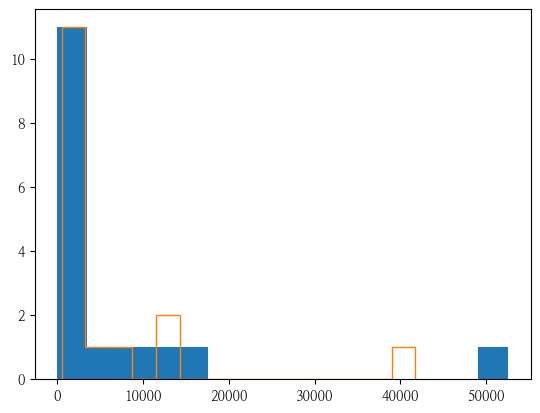

In [39]:
# 2000년도 대구지역에서 타지역으로 이동이구수 문포

plt.hist(deagu_df_1['2000'], bins=15, histtype='stepfilled')  # stepfilled 는 속을 채움
plt.hist(deagu_df_1['2017'], bins=15, histtype='step')
plt.show()

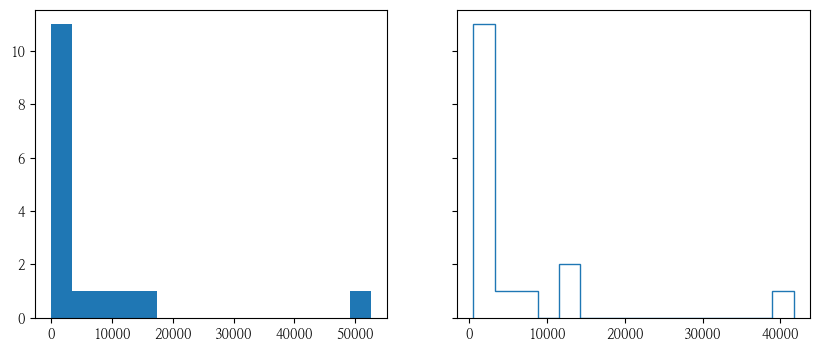

In [40]:
fig = plt.figure(figsize=[10,4])
ax1, ax2 = fig.subplots(1, 2, sharey=True)
ax1.hist(deagu_df_1['2000'], bins=15)
ax2.hist(deagu_df_1['2017'], bins=15, histtype='step')

plt.show()